# Python for Spatial Analysis
## Second part of the module of GG3209 Spatial Analysis with GIS.
### Notebook to learn and practice Data Visualisation method.

---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - First Iteration 2023 v.1.0 

### Introduction 

After practicing **Pandas**, this notebook aims to work with different libraries for graphing and visualizing data using **Python**. Specifically, we will investigate **matplotlib**. We will further explore **Seaborn** and **Pandas**, which make use of matplotlib library.

### Content

* Prepare data for use in a graph.
* Make basic graphs using matplotlib, Seaborn, and Pandas.
* Plot images using matplotlib.
* Understand the differences between and how to use figures and axes or subplots.
* Refine graphs using matplotlib.
* Save graphics to vector or raster graphic files.





## matplotlib


As the name describes, **matplotlib** is based on the graphing functions available in MatLab. 

It allows for the generation of a wide variety of graph types and data visualizations. Further, graphs can be edited, customized, and saved using Python code. 

Here is the link for the [documentation](https://matplotlib.org/stable/index.html) in case you need more information.

This library has been already included in our **py4sa.yml** environment file, so you have already installed it into your MiniConda environment. 

To make graphs, you will work with the **pyplot module** specifically, so it is common to call in that specific module and assign it an alias name. To have the graphs plot in a Jupyter Notebook, you will need to include "%maplotlib inline" in your code. You can also change default parameters. 

## Datasets

In order to provide examples of a wide variety of graph types, We will use the datasets avaliable in the data folder, if you need details about the source of the data, take a look at the **metadata.md** integrated in that folder.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # alias is plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] #Change the default plot size.

In [28]:
# The Scottish Index of Multiple Deprivation (SIMD) 2020 
simd = pd.read_csv("data/SG_SIMD_2020.csv", header=0)
simd.columns =[column.replace(" ", "_") for column in simd.columns]  # Removing any spaces in the column names using list comprehension.
simd.tail(5)

,OID_,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,...,GAccBrdbnd,GAccRank,CrimeCount,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank
6971,6971,S01013477,Broxburn South - 06,West Lothian,612,355,2464,2,4,8,...,0%,5672,13,217,3161.0,93,10,15%,2%,1671.0
6972,6972,S01013478,Broxburn East - 01,West Lothian,817,582,3681,3,6,11,...,0%,5402,29,350,1819.0,87,1,10%,0%,3594.0
6973,6973,S01013479,Broxburn East - 02,West Lothian,785,479,1423,2,3,5,...,1%,5424,44,560,795.0,96,9,12%,1%,2624.0
6974,6974,S01013480,Broxburn East - 03,West Lothian,677,410,3291,3,5,10,...,0%,3524,7,106,5007.0,107,1,16%,0%,1865.0
6975,6975,S01013481,Broxburn East - 04,West Lothian,462,305,5269,4,8,16,...,8%,2384,13,287,2364.0,67,2,15%,0%,2082.0


In [44]:
simd.columns

Index(['OID_', 'DataZone', 'DZName', 'LAName', 'SAPE2017', 'WAPE2017',
       'Rankv2', 'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2',
       'IncRate', 'IncNumDep', 'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank',
       'HlthCIF', 'HlthAlcSR', 'HlthDrugSR', 'HlthSMR', 'HlthDprsPc',
       'HlthLBWTPc', 'HlthEmergS', 'HlthRank', 'EduAttend', 'EduAttain',
       'EduNoQuals', 'EduPartici', 'EduUniver', 'EduRank', 'GAccPetrol',
       'GAccDTGP', 'GAccDTPost', 'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet',
       'GAccPTGP', 'GAccPTPost', 'GAccPTRet', 'GAccBrdbnd', 'GAccRank',
       'CrimeCount', 'CrimeRate', 'CrimeRank', 'HouseNumOC', 'HouseNumNC',
       'HouseOCrat', 'HouseNCrat', 'HouseRank'],
      dtype='object')

In [14]:
# House sales prices in Scotland 
houses_prices = pd.read_csv("data/house-sales-prices.csv", header=0)
houses_prices.columns =[column.replace(" ", "_") for column in houses_prices.columns] # Removing any spaces in the column names using list comprehension.
houses_prices.head(5)

,RefArea,Reference_Area,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,S92000003,Scotland,55200,57798,58990,60277,63775,66127,70595,74224,...,159075,163396,163264,158491,162266,175043,176787,173982,180663,181457
1,S12000033,Aberdeen City,62601,66747,65194,67367,69634,72194,75770,78665,...,178330,188299,192384,192910,205666,221236,232228,215119,210428,199125
2,S12000034,Aberdeenshire,63952,67675,67932,68846,70669,74293,78485,79947,...,198155,206129,210272,207905,218734,230901,235254,218032,216351,214414
3,S12000041,Angus,50774,52543,53604,55039,57474,57694,60502,64933,...,146889,149402,147126,147635,147753,156662,166519,162570,160776,163377
4,S12000035,Argyll and Bute,58199,61329,60683,63402,65042,74949,68691,74841,...,152428,157444,157246,149470,154078,149467,154750,157152,157430,162956


In [7]:
# Runoff data per month
runoff = pd.read_csv("data/runoff_data_by_month.csv", header=0)
runoff.columns =[column.replace(" ", "_") for column in runoff.columns] # Removing any spaces in the column names using list comprehension.
runoff.head(10)

,month,Year,runoff
0,Jan,1991,135.082
1,Feb,1991,99.018
2,Mar,1991,152.954
3,Apr,1991,126.352
4,May,1991,16.436
5,Jun,1991,2.752
6,Jul,1991,0.909
7,Aug,1991,0.399
8,Sep,1991,0.655
9,Oct,1991,0.976


In [9]:
# Latest Earthquakes in Feb 2023
earthquakes = pd.read_csv("data/Latest_earthquake_world.csv", header=0)
earthquakes.columns =[column.replace(" ", "_") for column in earthquakes.columns] # Removing any spaces in the column names using list comprehension.
earthquakes.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-23T08:01:02.881Z,38.1280,73.2184,10.000,4.70,mb,75.0,55.0,1.7450,0.66,...,2023-02-23T08:35:43.040Z,"65 km W of Murghob, Tajikistan",earthquake,4.00,1.907,0.058,91.0,reviewed,us,us
1,2023-02-23T06:55:34.020Z,18.7946,-63.9205,10.000,3.67,md,19.0,228.0,1.1264,0.50,...,2023-02-23T08:02:57.172Z,Leeward Islands,earthquake,5.27,4.420,0.130,14.0,reviewed,pr,pr
2,2023-02-23T06:50:49.137Z,38.4879,72.8122,10.000,4.50,mb,21.0,171.0,1.2640,0.56,...,2023-02-23T07:28:35.040Z,"106 km WNW of Murghob, Tajikistan",earthquake,8.00,2.000,0.140,15.0,reviewed,us,us
3,2023-02-23T06:18:13.280Z,-8.5483,-77.6254,66.540,4.70,mb,44.0,154.0,3.5030,0.47,...,2023-02-23T07:15:40.040Z,"22 km SW of Quiches, Peru",earthquake,8.10,8.700,0.064,74.0,reviewed,us,us
4,2023-02-23T03:36:09.429Z,-18.2870,-177.8261,524.983,4.90,mb,40.0,63.0,3.6260,0.67,...,2023-02-23T03:50:54.040Z,NaN,earthquake,13.43,10.963,0.108,27.0,reviewed,us,us


## Basic Graphs


Before you can create complex and well-refined graphs, we need to know the basics. Here we can see how to generate simple graphs using the basic matplotlib syntax.

In the first example below I have produced a basic scatter plot to visualize the relationship between mean elevation and mean annual temperature at the county-level in the high plains states as an example of a bivariate graph. The first argument, elevation, is plotted to the x-axis and the second argument, temperature, is plotted to the y-axis. Here, I used dot notation; however, bracket notation is also acceptable. The graph is saved to a variable then the show() method from the pyplot module is used to plot the graph. It isn't necessary to provide the graph name as an argument as the last created graph will be plotted by default.

Although this graph is adequate to simply visualize the data and the relationship between the two variables, it is still a bit rough to include in a presentation or report. We will cover refining the output later in this module.

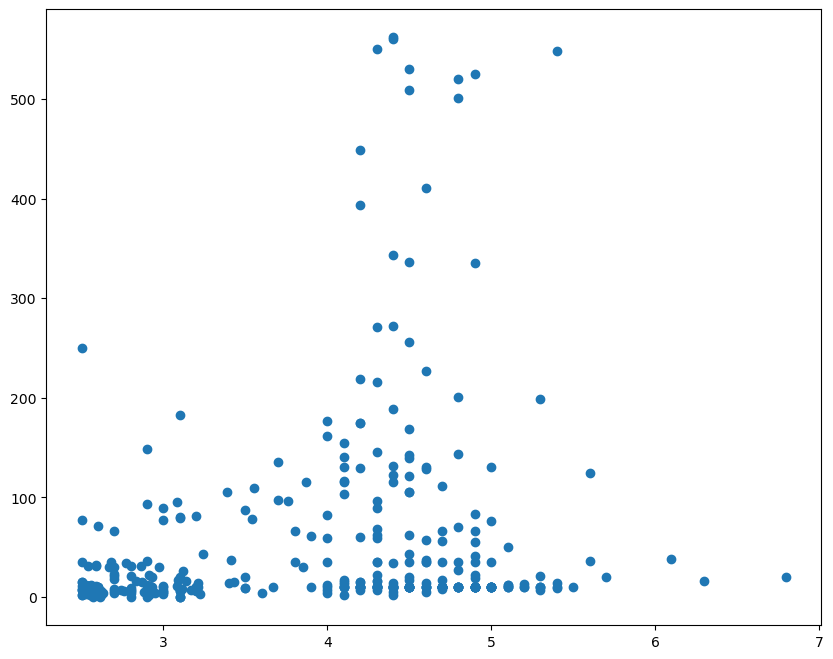

In [12]:
sp1 = plt.scatter(earthquakes.mag, earthquakes.depth)
#plt.scatter(hp["elev"], hp["temp"])
plt.show(sp1)

Histograms are also a useful chart we can create and help us to do some exploratory analysis within the data we have loaded. In the following example you are creating an Histogram of the magnitude attribute of the earthquakes dataset. Since this is a histogram, which is a univariate graph, only one variable has to be provided.

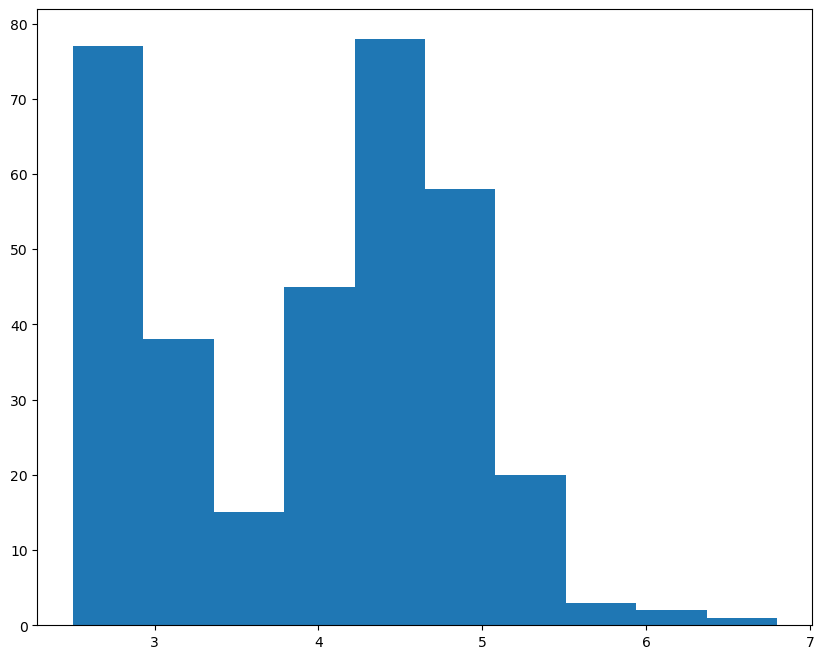

In [20]:
hist1 = plt.hist(earthquakes['mag'])
plt.show(hist1)

Histograms accept an additional, optional bins parameter to specify the number of data bins to include.

In the following example we can learn about the subplots or axes in matplotlib. 

A figure represents the entire space in which graphs are generated. Figures are further divided into **subplots or axes**, which allow you to place multiple plots in the same graph space.

There are multiple ways to implement this. In the following example, I am creating a figure called fig1 that contains two rows and two columns. The positions of the subplots within the figure are defined relative to the rows and columns defined using indexes relative to axs, or the subplots.

So, in this example, you have placed a separate graph, representing a different bin width, in each of the four available row/column combinations.

If you do not define multiple subplots, a plot will take up the entire graph or figure space by default.

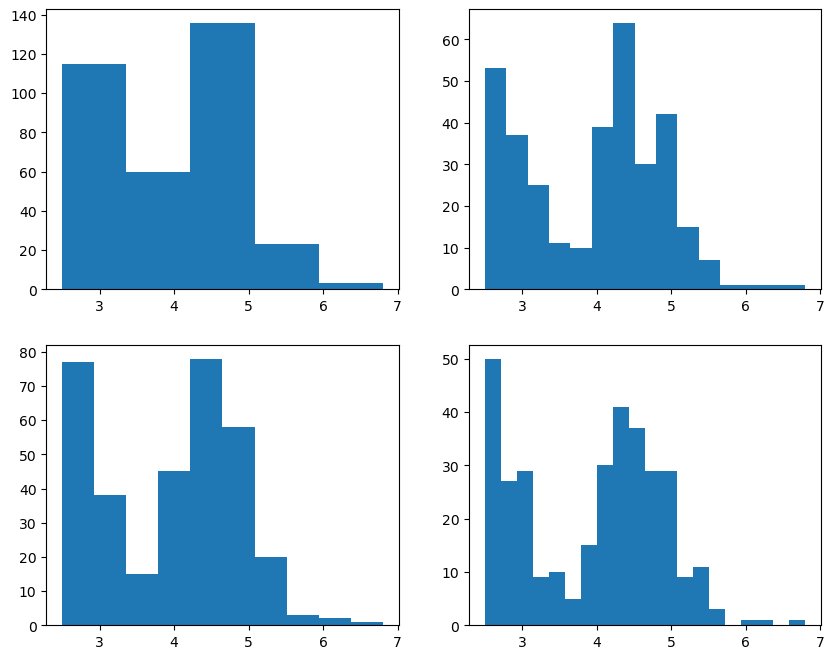

In [21]:
fig1, axs = plt.subplots(2,2)
axs[0,0].hist(earthquakes.mag, bins=5)
axs[1,0].hist(earthquakes.mag, bins=10)
axs[0, 1].hist(earthquakes.mag, bins=15)
axs[1, 1].hist(earthquakes.mag, bins=20)
plt.show(fig1)

The example below shows how to generate a **boxplot** to visualize the distribution of a continuous variable, in this case house prices in 2015.

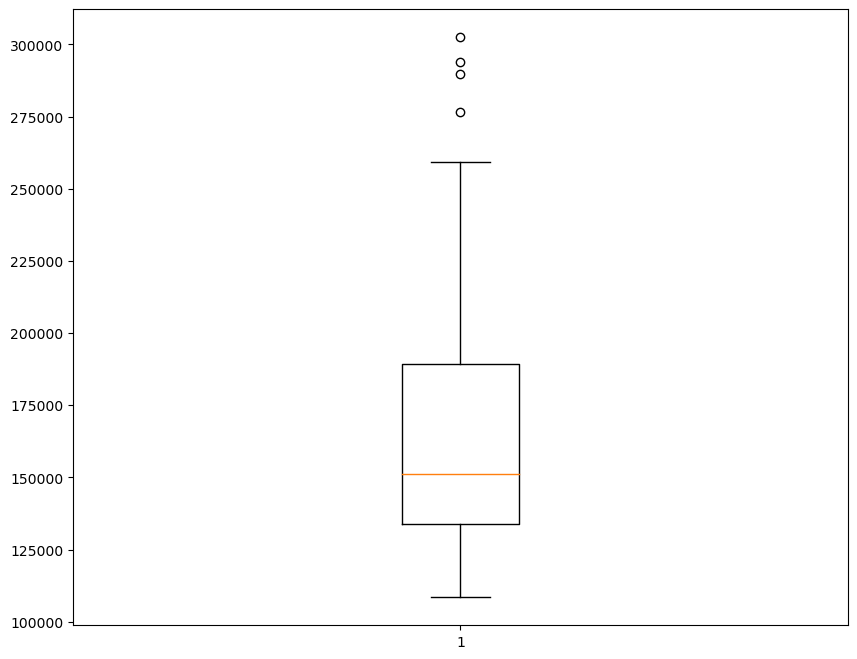

In [24]:
bp1 = plt.boxplot(x=houses_prices['2015'])
plt.show(bp1)

Now, let's combine a set of different graphs as a single figure using multiple **subplots**. 

Make sure you understand how indexes are used to reference each subplot within the figure. The plot here are just an example, so you can play with them and bring another variables, or maybe try out to increase the number of plots in the figure. 

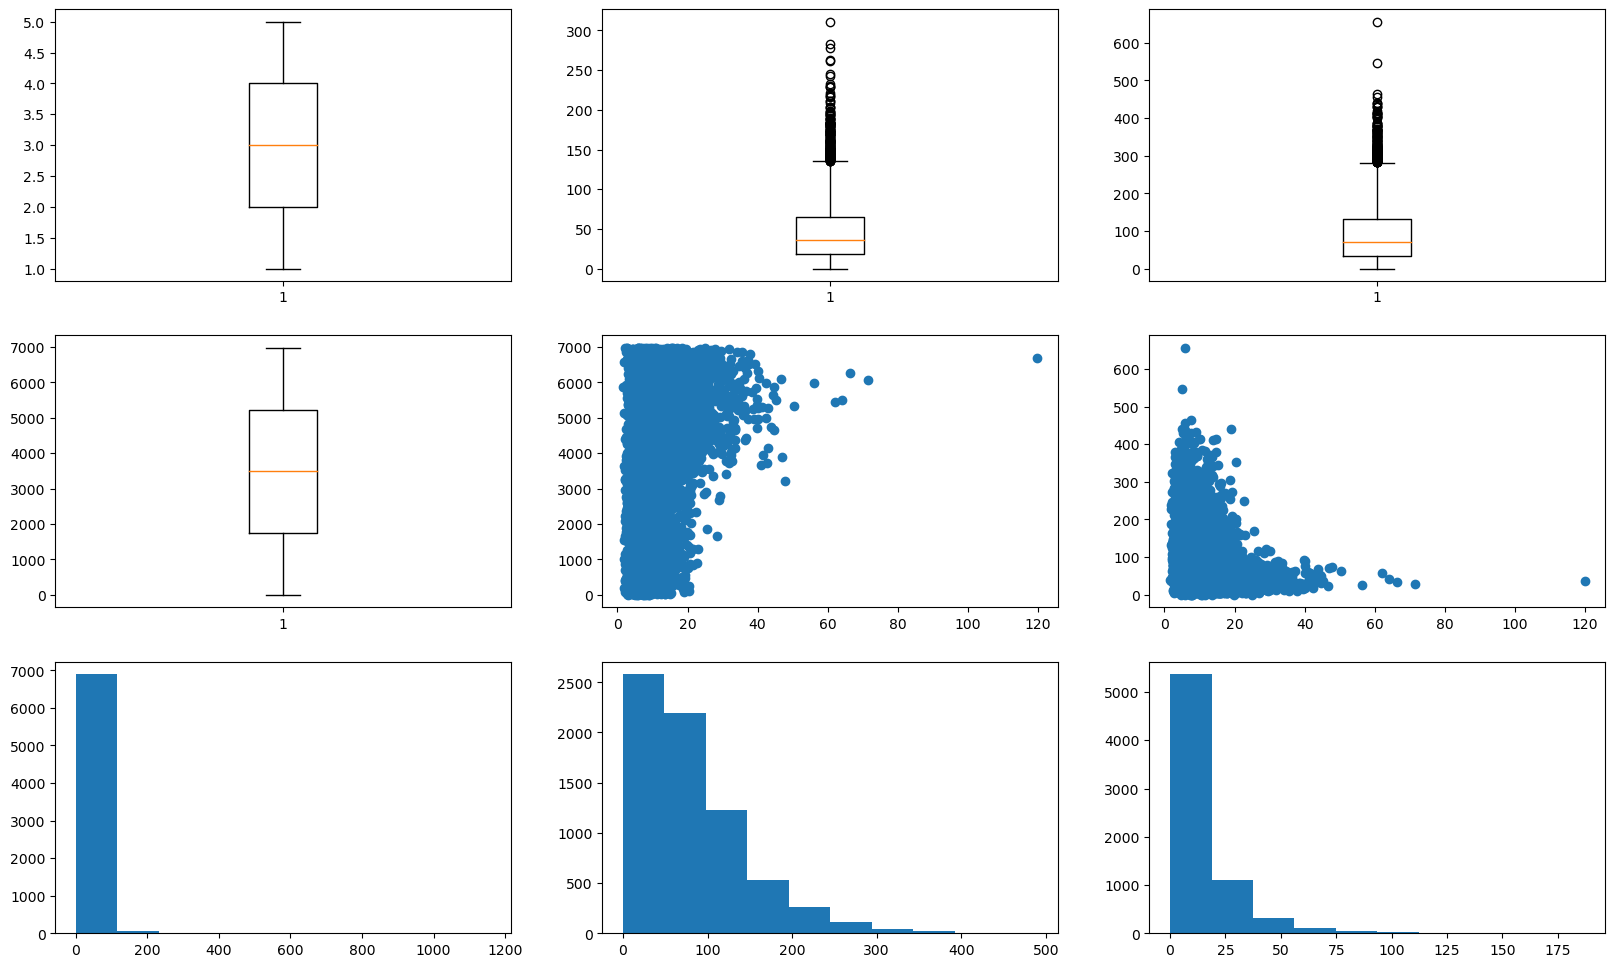

In [31]:
plt.rcParams['figure.figsize'] = [20, 12] #Change the default plot size.
fig1, axs = plt.subplots(3,3)
axs[0,0].boxplot(simd.Quintilev2)
axs[0,1].boxplot(simd.EmpNumDep)
axs[0,2].boxplot(simd.IncNumDep)
axs[1,0].boxplot(simd.EduRank)
axs[1,1].scatter(simd.GAccPTGP, simd.HlthRank)
axs[1,2].scatter(simd.GAccPTGP, simd.IncNumDep)
axs[2,0].hist(simd.CrimeCount)
axs[2,1].hist(simd.HouseNumOC)
axs[2,2].hist(simd.HouseNumNC)
plt.show(fig1)

You should now have a basic understanding of how to generate simple plots using matplotlib and how to include subplots within a figure. 

There are way too many customization options to cover in detail and frankly does not make any sense to learn every single command, what's important initially is getting familiar with the library and get the basics to plot a dataset, once you understand that, if you need a more customized plot, you can visit the documentation and get the guidance for the option you are looking for. For more details and to investigate specific options, please consult the [matplotlib documentation](https://matplotlib.org/).

There are certain rules or best practices.

1. Know your audience
2. Identify what you need to tell with your plot
3. Adapt the figure, so Do not trust the defaults
4. Captions are not optional
5. Use color appropriately
7. Do not mislead the reader, describe what the data says
8. Avoid "chartjunk", create the ones that support your story
9. Create a plot is not always easy. 



## Some useful cheat-sheets 

It is not necessary that you learn all the syntax of the library, but once you understand how the library work you can use the following Cheat Sheets to get the guidance to create any type of plot you need for your project or code.

Source: https://matplotlib.org/cheatsheets/

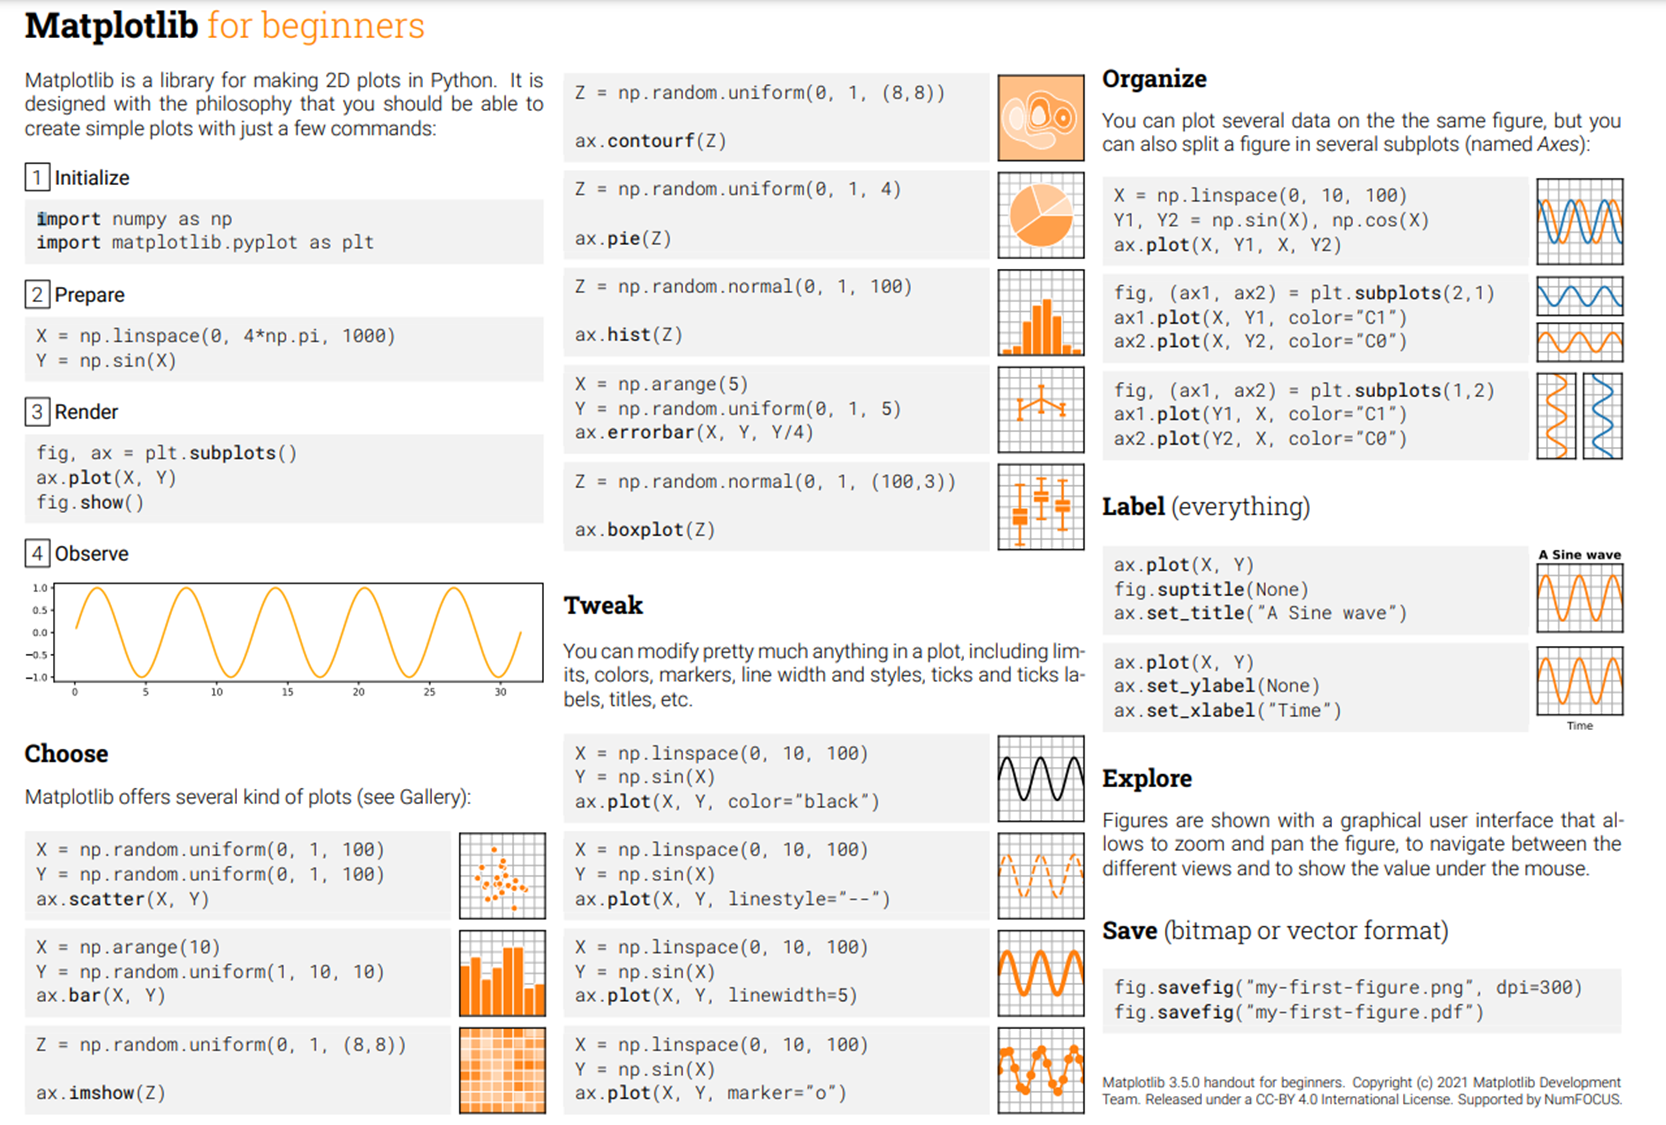

## Seaborn

Seaborn is a Python library based on **matplotlib** and simplifies the generation of a variety of graph types and data visualizations.

It is also an easier way to interact with matplotlib. Here is a link to the Seaborn [documentation](https://seaborn.pydata.org/). This library has been already integrated in our python environment, so you just need to import it.

In [2]:
import seaborn as sns

Now run the following cell, but also take some time to update the attributes/parameters and create different plots, For example in the following example, we are plotting Depth Vs Magnitude. 

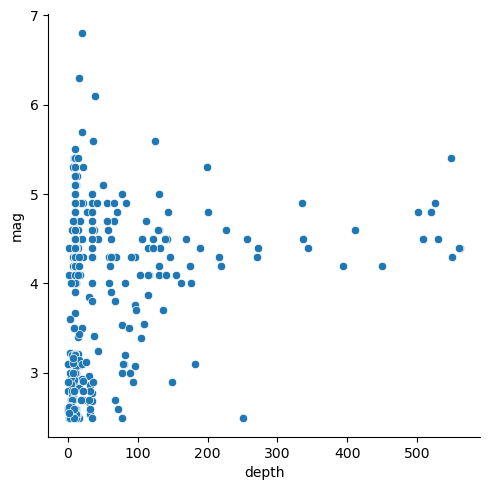

In [12]:
sns.relplot(x="depth", y="mag", data=earthquakes)


It is possible to map variables to other graphical parameters, other than just the position along the x-axis and y-axis. In this example, we could map the magSource to the point color as a qualitative or categorical variable using the hue parameter. Seaborn automatically chooses unordered colors, or a qualitative color scheme. If you want you can customise that with additional parameters

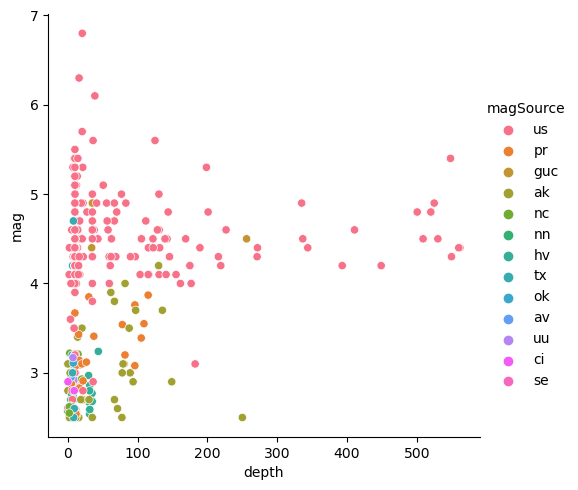

In [8]:
sns.relplot(x="depth", y="mag", hue="magSource", data=earthquakes)


Additionally, you could also define a point symbol or style as opposed to the color or hue. Mapping to the point symbol would not make sense for a continuous variable, since there is no implied order for symbols. However, a continuous variable could be mapped to the symbol color or size.

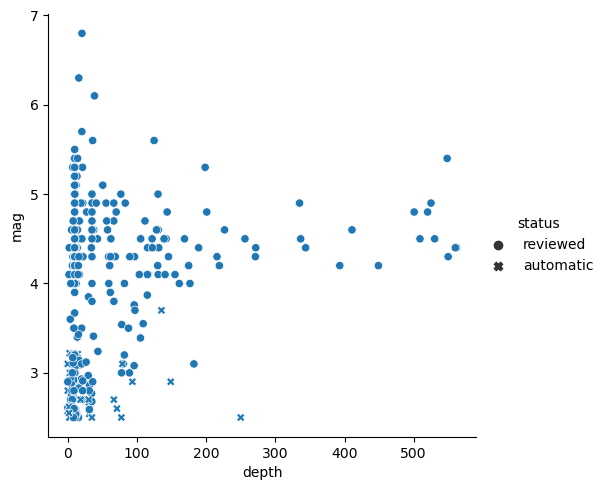

In [11]:
sns.relplot(x="depth", y="mag", style="status", data=earthquakes)

In order to refine or improve Seaborn plots you can use methods made available by Seaborn and/or methods made available by matplotlib, since Seaborn is built on top of matplotlib. However there are some differences that are out of the approach of this course, but we will cover in a future module.

Just for your curiosity:  One complexity is that some Seaborn graphs are produced as a FacetGrid object and cannot be placed into a subplot within a figure. relplot() is an example. Other plot methods generate the data at an axes or subplot level, such as scatterplot().

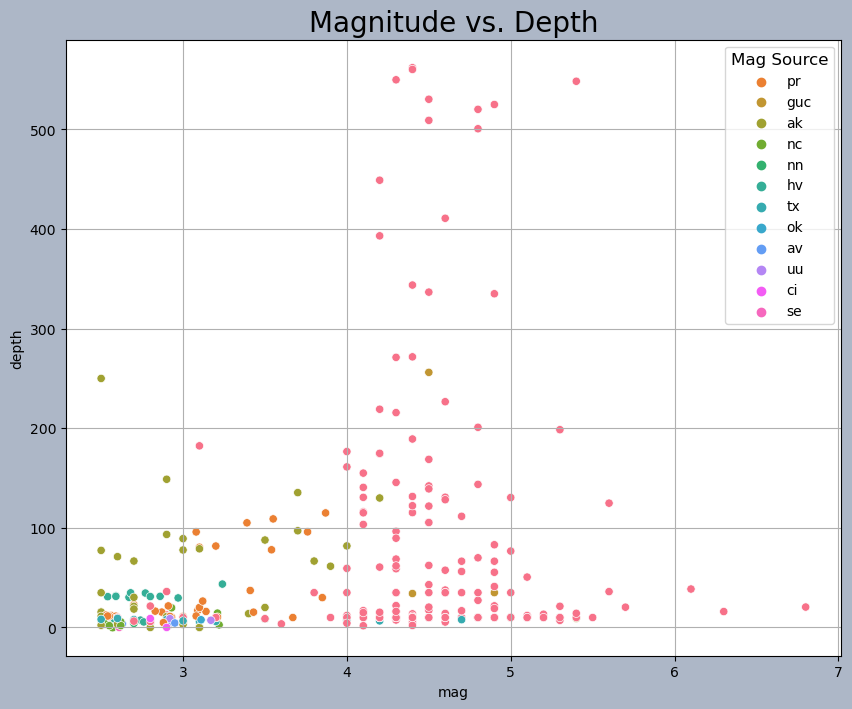

In [21]:
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="mag", y="depth", hue="magSource", data=earthquakes)
axs.set_title("Magnitude vs. Depth", fontsize=20, color="#000000")
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles[1:], labels=labels[1:], title="Mag Source", title_fontsize=12) # Optional
axs.grid(True)
fig.patch.set_facecolor('#adb7c7')
plt.show(fig)

Now, here I will describe the way you can create the most popular plots using seaborn.
- Line Plot
- Histograms
- Bar Plot
- Box Plot
- Heatmap
- Pair Plot
- Violin Plot
- Swarm Plot
- Join Plot

Using a dataset incorporated in the library we can describe how you can create this type of graphs. 

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Load example data from the seaborn library
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

In [6]:
tips
#iris #You can try to

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


A line plot is a graph that displays data points connected by straight lines.
It is useful for showing trends over time or comparing changes in different groups.
Seaborn’s lineplot() function can be used to  create line plots,with optional customization of colors, markers, and line styles.

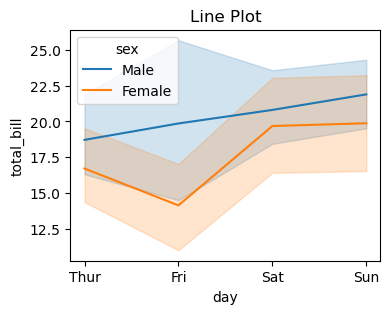

In [16]:
plt.figure(figsize=(4, 3))
sns.lineplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('Line Plot')
plt.show()

Like we see in the previous section a histogram is a graphical representation of the distribution of a dataset.
It divides the range of values in to a set of intervals,and then counts the number of values that fall into each interval.

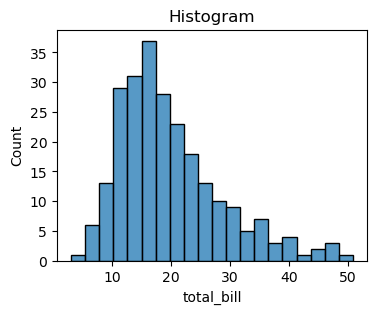

In [8]:
plt.figure(figsize=(4, 3))
sns.histplot(data=tips, x='total_bill', bins=20)
plt.title('Histogram')
plt.show()

A bar plot is a graph that displays categorical data with rectangular bars.It is useful for comparing the values of different categories.

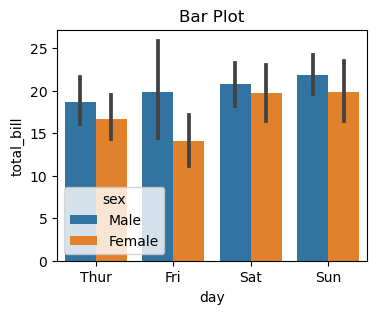

In [9]:
plt.figure(figsize=(4, 3))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('Bar Plot')
plt.show()

A boxplot is a graph that displays the distribution of a dataset using five summary statistics:

-   minimum

-    first quartile

-    median

-    third quartile,

-    maximum.

It is useful for identifying outliers and comparing the distributions of different groups.

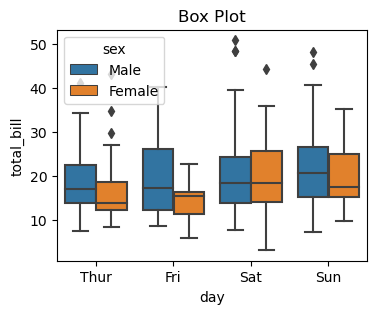

In [10]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('Box Plot')
plt.show()

A heatmap is a graphical representation of a matrix of values, where the values are represented as
colors. It is useful for visualizing patterns in large datasets.

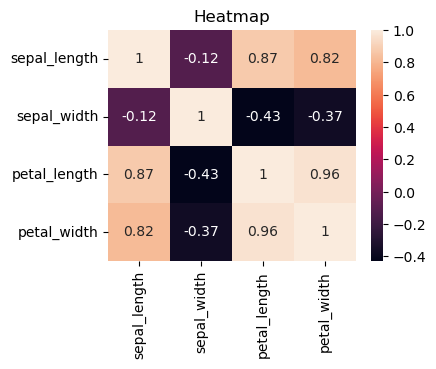

In [11]:
plt.figure(figsize=(4, 3))
sns.heatmap(data=iris.corr(), annot=True)
plt.title('Heatmap')
plt.show()

A pair plot is a graph that displays pair wise relationships between variables in a dataset.It is
useful for exploring the correlations between different variables

<Figure size 400x300 with 0 Axes>

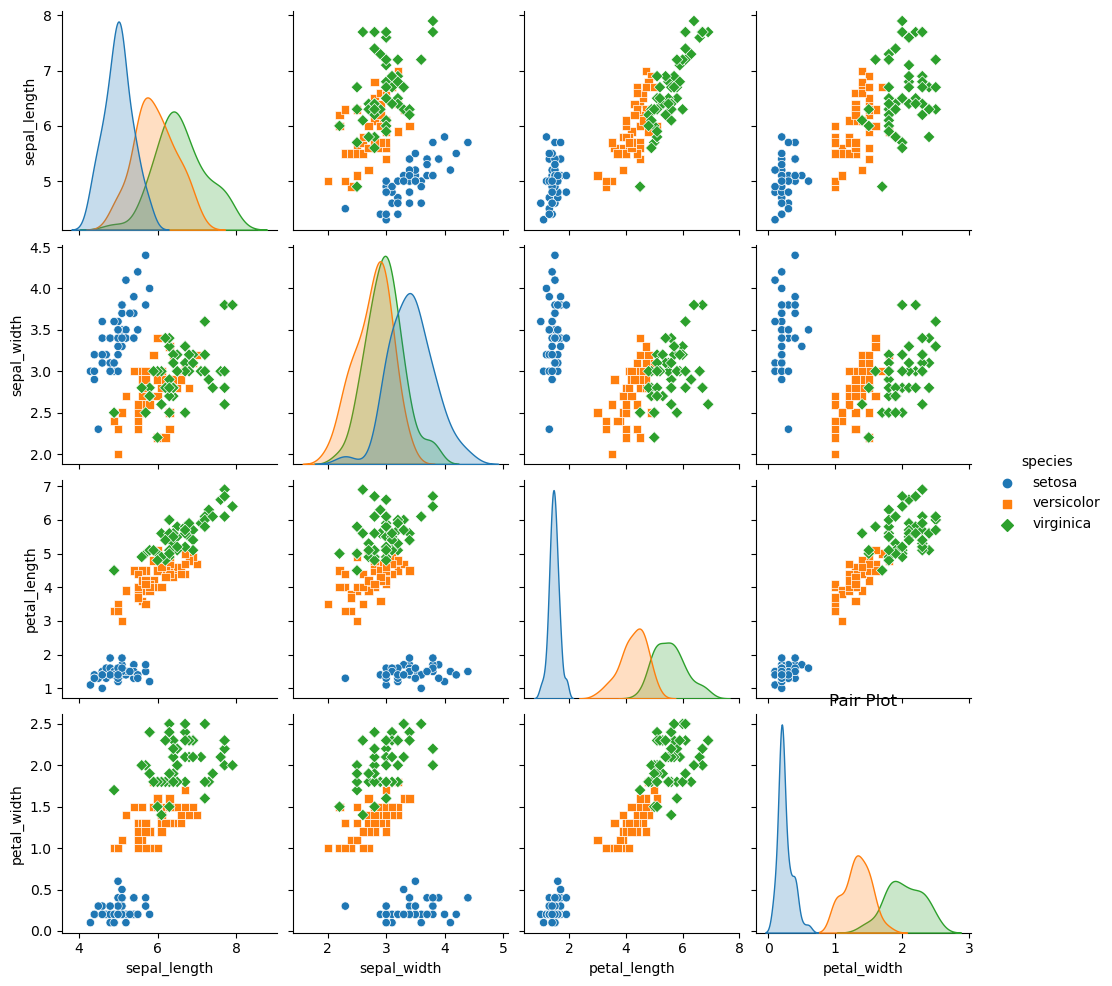

In [12]:
plt.figure(figsize=(4, 3))
sns.pairplot(data=iris, hue='species', markers=['o', 's', 'D'])
plt.title('Pair Plot')
plt.show()

A violin plot is a combination of a box plot and a kernel density plot.It displays the distribution
of a data set with a combination of a box plot and a density plot, where the density plot shows the
estimated probability density function.

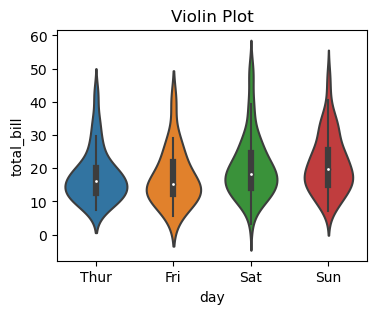

In [13]:
plt.figure(figsize=(4, 3))
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title('Violin Plot')
plt.show()

A swarm plot is a graph that displays the distribution of a dataset by placing each data point on a line.It is useful for showing the density of data points and highlighting potential outliers.

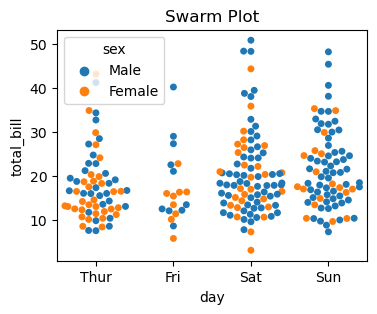

In [14]:
plt.figure(figsize=(4, 3))
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('Swarm Plot')
plt.show()

A joint plot is a graph that displays the relationship between two variables using both a scatter
plot and a histogram.It is useful for exploring the correlations between different variables and
identifying patterns in the data.

<Figure size 400x300 with 0 Axes>

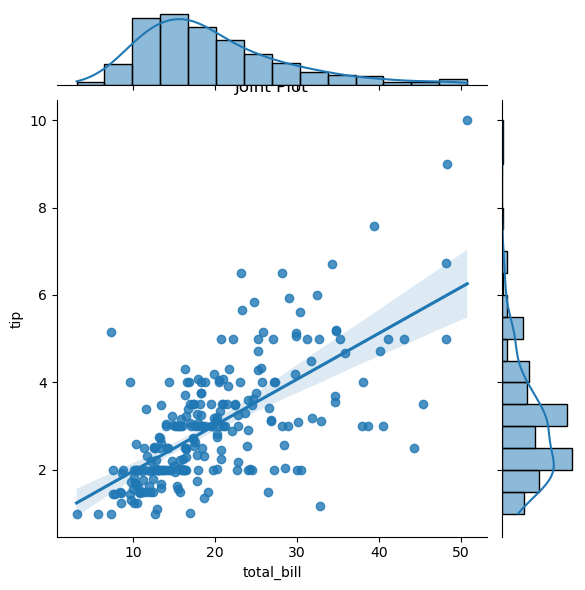

In [15]:
plt.figure(figsize=(4, 3))
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')
plt.title('Joint Plot')
plt.show()

## Pandas 

Another option for generating graphs is to make use of the graphing functionality built into Pandas. Similar to Seaborn, this is based on matplotlib. In this course we will not discuss graphing with Pandas in more detail. But is required you learn the basics. 

The documentation for the [data visualization components of Pandas can be found here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

For example you can easily plot a histogram based on the attributes of your pandas dataframe.

<AxesSubplot: ylabel='Frequency'>

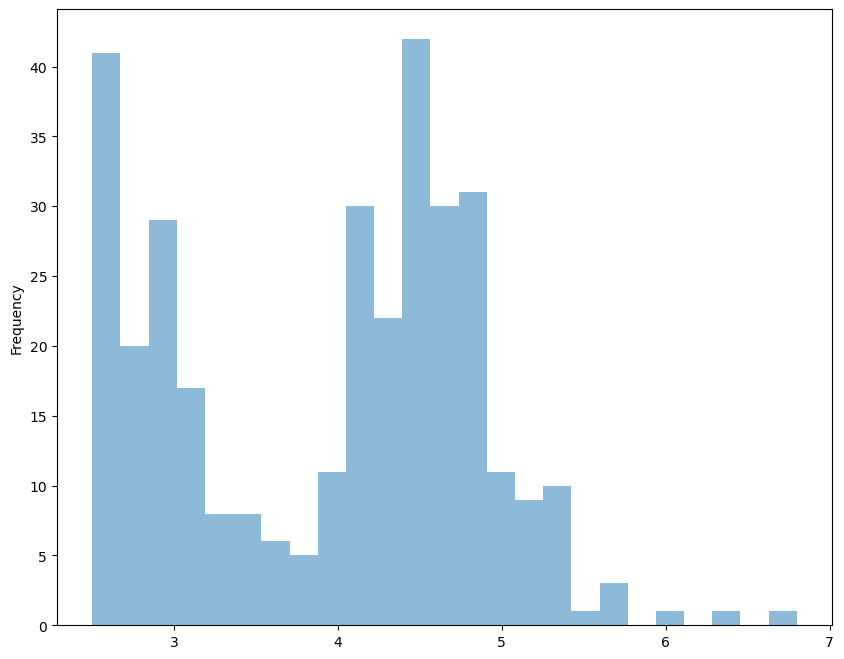

In [23]:
earthquakes.mag.plot.hist(alpha=0.5,bins=25)

Pandas and matplotlib include some default styles. In the example below, I am using the "ggplot" style based on the "ggplot2" R package. Note that the default style can be restored using "default".

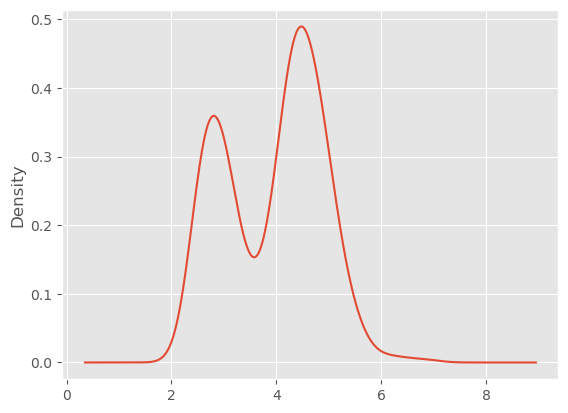

In [26]:
plt.style.use("ggplot")
earthquakes.mag.plot.kde()
plt.style.use('default')

This is an example of a scatterplot. Instead of calling a method relative to a specific variable, the x and y values are defined relative to variables stored in a DataFrame.

<AxesSubplot: xlabel='IncNumDep', ylabel='EmpNumDep'>

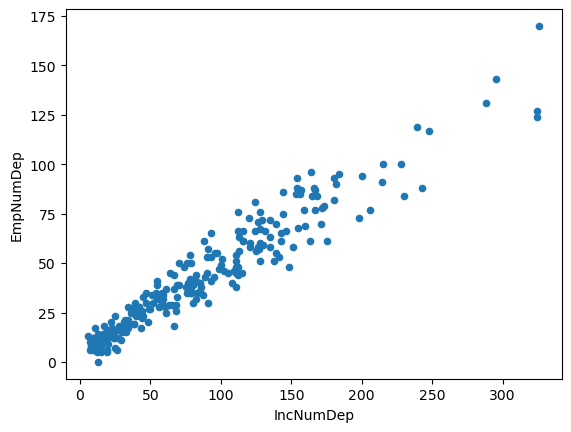

In [47]:
sample_simd = simd[(simd["LAName"]=="West Lothian")] #subsetting a small portion of our previously created dataframe
sample_simd.plot.scatter(x='IncNumDep', y='EmpNumDep')


This is an example of a boxplot generated using Pandas. The by argument defines the grouping variable (the sub-region of the country in this case).

<AxesSubplot: title={'center': 'CrimeRate'}, xlabel='Quintilev2'>

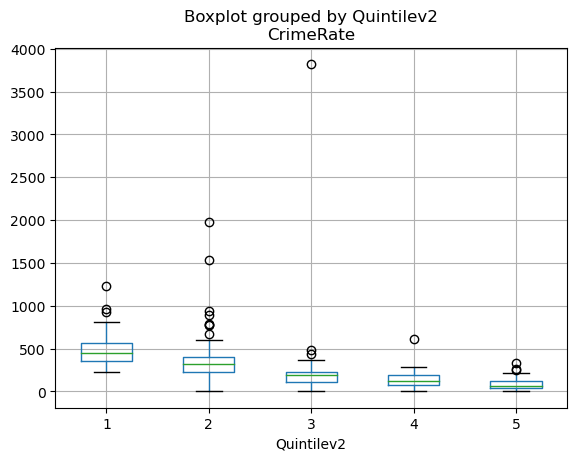

In [53]:
sample_simd.boxplot(column='CrimeRate', by='Quintilev2')

Similar to Seaborn, Pandas plots can be customized and edited using matplotlib.

## Export Graphics


Once a graph is produced using matplotlib, Seaborn, and/or Pandas, it can be exported using the savefig() method from matplotlib. You may find that you need to do additional editing to further refine a graph. This can best be accomplished using a vector graphics editing software, such as Adobe Illustrator or the free and open-source Inkscape software. PDF files can also be imported into vector graphics software.

There are a variety of export options. I recommend reading through the documentation for [savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html).




In [56]:
plt.savefig("data/image_svg.svg", dpi=300, format="svg")
plt.savefig("data/image_png.png", dpi=300, format="png")

<Figure size 640x480 with 0 Axes>